In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\KARRI KUJITHA\OneDrive\Desktop\student performance.csv")
df

,Student_ID,Gender,Study_Hours,Attendance,Internal_Marks,Assignment_Score,Midterm_Score,Final_Score,Final_Result
0,1,Male,2,65,12,10,22,44,Fail
1,2,Female,4,80,20,16,35,71,Pass
2,3,Male,1,55,10,8,18,36,Fail
3,4,Female,6,90,25,18,42,85,Pass
4,5,Male,3,70,15,12,28,55,Pass
5,6,Female,5,85,22,17,40,79,Pass
6,7,Male,2,60,13,11,24,48,Fail
7,8,Female,7,95,28,19,45,92,Pass
8,9,Male,4,75,18,14,32,64,Pass
9,10,Female,1,50,9,7,15,31,Fail


In [3]:
df.isnull().sum()

Student_ID          0
Gender              0
Study_Hours         0
Attendance          0
Internal_Marks      0
Assignment_Score    0
Midterm_Score       0
Final_Score         0
Final_Result        0
dtype: int64

In [4]:
legen=LabelEncoder()
leres=LabelEncoder()
df["Gender"]=legen.fit_transform(df["Gender"]) # male=1, female=0
df["Final_Score"]=leres.fit_transform(df["Final_Score"])  # pass=1, fail=0
df

,Student_ID,Gender,Study_Hours,Attendance,Internal_Marks,Assignment_Score,Midterm_Score,Final_Score,Final_Result
0,1,1,2,65,12,10,22,4,Fail
1,2,0,4,80,20,16,35,12,Pass
2,3,1,1,55,10,8,18,2,Fail
3,4,0,6,90,25,18,42,16,Pass
4,5,1,3,70,15,12,28,8,Pass
5,6,0,5,85,22,17,40,15,Pass
6,7,1,2,60,13,11,24,6,Fail
7,8,0,7,95,28,19,45,18,Pass
8,9,1,4,75,18,14,32,10,Pass
9,10,0,1,50,9,7,15,1,Fail


In [5]:
X=df.drop(["Student_ID","Final_Result"],axis=1)
y=df["Final_Result"]

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [7]:
model=RandomForestClassifier(
    n_estimators=100,  # no.of sample trees
    random_state=42
)
model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [8]:
ypre=model.predict(X_test)
acc=accuracy_score(y_test,ypre)
print("accuracy",acc*100,"%")

accuracy 100.0 %


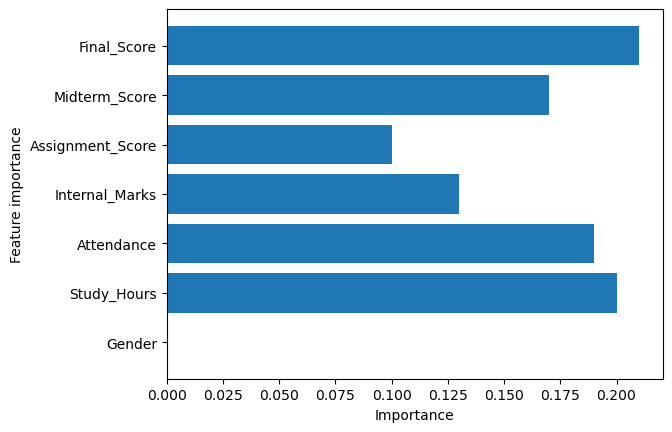

In [9]:
imp=model.feature_importances_
fea=X.columns
plt.barh(fea,imp)
plt.xlabel("Importance")
plt.ylabel("Feature importance")
plt.show()

In [10]:
new_student = pd.DataFrame([{
    "Gender": 1,
    "Study_Hours": 4,
    "Attendance": 78,
    "Internal_Marks": 18,
    "Assignment_Score": 14,
    "Midterm_Score": 32,
    "Final_Score": 65
}])

prediction = model.predict(new_student)
probability = model.predict_proba(new_student)

result = "Pass" if prediction[0] == 1 else "Fail"

print("Prediction:", result)
print("Probability [Fail, Pass]:", probability)

Prediction: Fail
Probability [Fail, Pass]: [[0. 1.]]


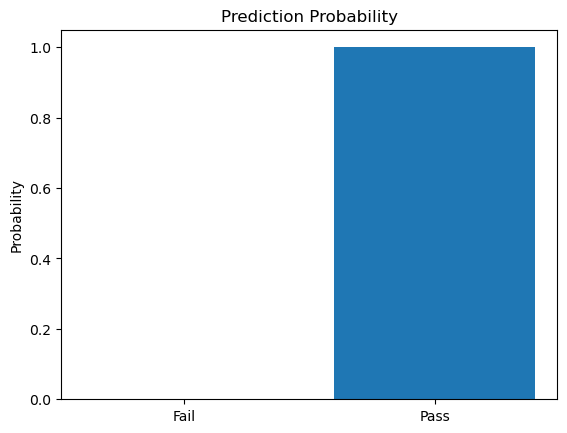

In [11]:
labels = ["Fail", "Pass"]
plt.bar(labels, probability[0])
plt.title("Prediction Probability")
plt.ylabel("Probability")
plt.show()